# Datos

- Vicente Rosales
- 21.233.477-4
- F. The Number of Subpermutations

# Demos de codigos


In [5]:
#imports
from collections import Counter

## Codigo iterativo
En esta seccion puedes probar distintas entradas para la version **iterativa** que resuelve el problema antes visto


Algunas entradas del problema oficial:
- [2, 4, 1, 3, 4, 2, 1, 2,]
- [1, 1, 2, 1, 2]

Salidas esperadas del problema oficial:
- 7
- 6

In [6]:
# Función para verificar si un subarreglo es una subpermutación válida del rango [1, n]
def is_subpermutation_iterative(counter, length):
    return len(counter) == length and all(counter.get(i, 0) == 1 for i in range(1, length + 1))

# Función para contar subpermutaciones en un subarreglo utilizando ventana deslizante
def count_subpermutations_in_array_iterative(arr):
    n = len(arr)
    total_count = 0

    for start in range(n):
        counter = Counter()
        print(f"Inicio ventana desde índice {start}:")
        for end in range(start, n):
            counter[arr[end]] += 1
            print(f"  Agregado {arr[end]} a la ventana: {dict(counter)}")
            if is_subpermutation_iterative(counter, end - start + 1):
                total_count += 1
                print(f"  Subpermutación válida encontrada en ventana ({start}, {end}): {arr[start:end + 1]}")

    return total_count

# Probar con el ejemplo
arr = [4,3,2,1]
print("\nNumero de suppermutaciones: ",count_subpermutations_in_array_iterative(arr))


Inicio ventana desde índice 0:
  Agregado 4 a la ventana: {4: 1}
  Agregado 3 a la ventana: {4: 1, 3: 1}
  Agregado 2 a la ventana: {4: 1, 3: 1, 2: 1}
  Agregado 1 a la ventana: {4: 1, 3: 1, 2: 1, 1: 1}
  Subpermutación válida encontrada en ventana (0, 3): [4, 3, 2, 1]
Inicio ventana desde índice 1:
  Agregado 3 a la ventana: {3: 1}
  Agregado 2 a la ventana: {3: 1, 2: 1}
  Agregado 1 a la ventana: {3: 1, 2: 1, 1: 1}
  Subpermutación válida encontrada en ventana (1, 3): [3, 2, 1]
Inicio ventana desde índice 2:
  Agregado 2 a la ventana: {2: 1}
  Agregado 1 a la ventana: {2: 1, 1: 1}
  Subpermutación válida encontrada en ventana (2, 3): [2, 1]
Inicio ventana desde índice 3:
  Agregado 1 a la ventana: {1: 1}
  Subpermutación válida encontrada en ventana (3, 3): [1]

Numero de suppermutaciones:  4


## Codigo recursivo
En esta seccion puedes probar distintas entradas para la version **recursiva** que resuelve el problema antes visto. 


Algunas entradas del problema oficial:
- [2, 4, 1, 3, 4, 2, 1, 2,]
- [1, 1, 2, 1, 2]

Salidas esperadas del problema oficial:
- 7
- 6

In [7]:
# Función para verificar si un subarreglo es una subpermutación
def is_subpermutation_recursive(subarray):
    n = len(subarray)
    if sorted(subarray) == list(range(1, n + 1)):
        print(f"Subpermutación válida encontrada: {subarray}")
        return True
    return False

# Función recursiva que implementa dividir y conquistar
def count_subpermutations_recursive(arr, l, r, depth=0):
    # Imprimir el estado actual del subarreglo que estamos analizando
    print(f"{'  ' * depth}Analizando subarreglo: {arr[l:r+1]}, índices: {l}-{r}")
    
    # Caso base: Si el subarreglo tiene un solo elemento
    if l == r:
        if arr[l] == 1:
            print(f"{'  ' * depth}Caso base: Subarreglo [1] válido")
            return 1
        else:
            print(f"{'  ' * depth}Caso base: Subarreglo [1] inválido")
            return 0
    
    # Dividimos el arreglo a la mitad
    mid = (l + r) // 2
    
    # Contamos subpermutaciones en la mitad izquierda y derecha
    left_count = count_subpermutations_recursive(arr, l, mid, depth + 1)
    right_count = count_subpermutations_recursive(arr, mid + 1, r, depth + 1)
    
    # Contamos subpermutaciones que cruzan la frontera
    cross_count = 0
    
    # Expandir hacia la izquierda desde el centro
    left_window = []
    for i in range(mid, l - 1, -1):
        left_window.append(arr[i])
        
        right_window = []
        # Expandir hacia la derecha desde el centro
        for j in range(mid + 1, r + 1):
            right_window.append(arr[j])
            combined = left_window + right_window
            print(f"{'  ' * depth}Verificando combinación cruzada: {combined}")
            if is_subpermutation_recursive(combined):
                cross_count += 1
    
    # Combinamos los resultados de las tres partes
    return left_count + right_count + cross_count

# Función principal para contar subpermutaciones en todo el arreglo
def count_subpermutations_in_array_recursive(arr):
    print("Iniciando análisis del arreglo completo:", arr)
    return count_subpermutations_recursive(arr, 0, len(arr) - 1)

# Probar con el ejemplo
arr = [4,3,2,1]
print("\nNumero de suppermutaciones: ",count_subpermutations_in_array_recursive(arr))

Iniciando análisis del arreglo completo: [4, 3, 2, 1]
Analizando subarreglo: [4, 3, 2, 1], índices: 0-3
  Analizando subarreglo: [4, 3], índices: 0-1
    Analizando subarreglo: [4], índices: 0-0
    Caso base: Subarreglo [1] inválido
    Analizando subarreglo: [3], índices: 1-1
    Caso base: Subarreglo [1] inválido
  Verificando combinación cruzada: [4, 3]
  Analizando subarreglo: [2, 1], índices: 2-3
    Analizando subarreglo: [2], índices: 2-2
    Caso base: Subarreglo [1] inválido
    Analizando subarreglo: [1], índices: 3-3
    Caso base: Subarreglo [1] válido
  Verificando combinación cruzada: [2, 1]
Subpermutación válida encontrada: [2, 1]
Verificando combinación cruzada: [3, 2]
Verificando combinación cruzada: [3, 2, 1]
Subpermutación válida encontrada: [3, 2, 1]
Verificando combinación cruzada: [3, 4, 2]
Verificando combinación cruzada: [3, 4, 2, 1]
Subpermutación válida encontrada: [3, 4, 2, 1]

Numero de suppermutaciones:  4


# Experimentacion


## Algoritmos
Las celdas de a continuacion solo son una reescritura de el codigo antes visto, de esta manera no mostraremos mensajes por pantalla antes de graficar

In [39]:
# imports
import pandas as pd
import numpy as np
import time
import psutil
from memory_profiler import memory_usage
from memory_profiler import profile
from collections import Counter
from graphviz import Digraph

In [9]:
@profile
def count_subpermutations_in_array_iterative(arr):
    def is_subpermutation_iterative(counter, length):
        return len(counter) == length and all(counter.get(i, 0) == 1 for i in range(1, length + 1))

    n = len(arr)
    total_count = 0
    for start in range(n):
        counter = Counter()
        for end in range(start, n):
            counter[arr[end]] += 1
            if is_subpermutation_iterative(counter, end - start + 1):
                total_count += 1
    return total_count

In [10]:
@profile
def count_subpermutations_in_array_recursive(arr):
    def is_subpermutation_recursive(subarray):
        n = len(subarray)
        if sorted(subarray) == list(range(1, n + 1)):
            return True
        return False

    def count_subpermutations_recursive(arr, l, r, depth=0):
        if l == r:
            if arr[l] == 1:
                return 1
            else:
                return 0

        mid = (l + r) // 2
        left_count = count_subpermutations_recursive(arr, l, mid, depth + 1)
        right_count = count_subpermutations_recursive(arr, mid + 1, r, depth + 1)

        cross_count = 0
        left_window = []
        for i in range(mid, l - 1, -1):
            left_window.append(arr[i])

            right_window = []
            for j in range(mid + 1, r + 1):
                right_window.append(arr[j])
                combined = left_window + right_window
                if is_subpermutation_recursive(combined):
                    cross_count += 1

        return left_count + right_count + cross_count

    return count_subpermutations_recursive(arr, 0, len(arr) - 1)

## Experimentos
En estas celdas encontraras como plantee mis experimentos 

### Tiempo de ejecucion por tamaño de lista

In [31]:
# Function to measure execution time
def measure_time(func, arr):
    start_time = time.time()
    func(arr)
    return (time.time() - start_time) * 1000

sizes = [10, 15, 25, 50, 75, 100]  # Array sizes to test
iterative_times = []
recursive_times = []

for size in sizes:
    # Generate a random array of the given size
    arr = np.random.randint(1, size + 1, size)
    
    # Measure time for iterative algorithm
    iter_time = measure_time(count_subpermutations_in_array_iterative, arr)
    iterative_times.append(iter_time)
    
    # Measure time for recursive algorithm
    rec_time = measure_time(count_subpermutations_in_array_recursive, arr)
    recursive_times.append(rec_time)


ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py


### Tiempos de ejecucion con distintos tipos y tamaños de listas
- listas ordenadas
- listas inversamente ordenados
- listas con valores repetidos o distribuciones no uniformes.

In [46]:
def measure_execution_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

def create_sorted_array(size):
    return list(range(1, size + 1))

def create_reverse_sorted_array(size):
    return list(range(size, 0, -1))

def create_non_uniform_array(size):
    half_size = size // 2
    return [i % (half_size + 1) + 1 for i in range(size)]

sizes = [10, 50, 100, 150, 200, 250, 300, 450]
types = ['sorted', 'reverse', 'non-uniform']
iterative_times = {t: [] for t in types}
recursive_times = {t: [] for t in types}

# Medir el tiempo de ejecución para cada tipo de array
for size in sizes:
    for t in types:
        if t == 'sorted':
            arr = create_sorted_array(size)
        elif t == 'reverse':
            arr = create_reverse_sorted_array(size)
        elif t == 'non-uniform':
            arr = create_non_uniform_array(size)
        
        exec_time = measure_execution_time(count_subpermutations_in_array_iterative, arr)
        iterative_times[t].append(exec_time)
        
        exec_time = measure_execution_time(count_subpermutations_in_array_recursive, arr)
        recursive_times[t].append(exec_time)


ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: C

### Tamaño de la pila de llamadas a lo largo del tiempo (recursivo)

In [40]:
def visualize_call_stack():
    # Graphviz Digraph to create a call stack diagram
    dot = Digraph(comment='Call Stack')

    def add_edges(node_id, depth, max_depth):
        if depth > max_depth:
            return
        # Add node for the current depth
        dot.node(f'node_{depth}', f'Call {depth}', shape='box')
        if depth > 0:
            dot.edge(f'node_{depth-1}', f'node_{depth}')
        # Recursively add child nodes
        add_edges(node_id, depth + 1, max_depth)

    # Create a simple call stack tree with depth 4 for illustration
    add_edges('root', 0, 4)

    dot.render('call_stack', format='png', cleanup=True)
    print("Call stack diagram saved as 'call_stack.png'")

### Carga de CPU

In [34]:
def measure_cpu_usage(func, *args):
    # Record the CPU usage before function execution
    start_cpu = psutil.cpu_percent(interval=None)
    
    # Execute the function
    result = func(*args)
    
    # Record the CPU usage after function execution
    end_cpu = psutil.cpu_percent(interval=None)
    
    # Return the result and the CPU usage
    return result, end_cpu - start_cpu
# Probar con diferentes tamaños de entrada
sizes = [10, 50, 100, 150, 200, 250, 300, 450]
cpu_usage_iterative = []
cpu_usage_recursive = []

for size in sizes:
    arr = list(range(1, size + 1))
    
    # Measure CPU usage for the iterative algorithm
    _, cpu_usage = measure_cpu_usage(count_subpermutations_in_array_iterative, arr)
    print(f"Uso de CPU para array de tamaño {size} (Iterativo): {cpu_usage:.2f}%")
    cpu_usage_iterative.append(cpu_usage)
    
    # Measure CPU usage for the recursive algorithm
    _, cpu_usage = measure_cpu_usage(count_subpermutations_in_array_recursive, arr)
    print(f"Uso de CPU para array de tamaño {size} (Recursivo): {cpu_usage:.2f}%")
    cpu_usage_recursive.append(cpu_usage)

ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
Uso de CPU para array de tamaño 10 (Iterativo): -2.40%
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
Uso de CPU para array de tamaño 10 (Recursivo): -100.00%
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
Uso de CPU para array de tamaño 50 (Iterativo): 26.70%
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
Uso de CPU para array de tamaño 50 (Recursivo): 16.70%
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
Uso de CPU para array de tamaño 100 (Iterativo): 16.70%
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
Uso de CPU para array de tamaño 100 (Recursivo): 15.90%
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
Uso de CPU para array de tamaño 150 (Iterativo): 8.70%
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
Uso de CPU para array de tamaño 150 (Recursivo): 5.80%
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.p

### Cantidad de memoria usada

In [29]:
sizes = [10, 50, 100, 150, 200, 250, 300, 450]
memory_usage_iterative = []
memory_usage_recursive = []

for size in sizes:
    arr = list(range(1, size + 1))
    
    # Iterative
    print(f"Numero de subpermutaciones en array de tamaño {size} (Iterativo): ", count_subpermutations_in_array_iterative(arr))
    # Medir uso de memoria (esto es un ejemplo, reemplaza con datos reales)
    memory_usage_iterative.append(10 + size * 0.5)  # Cambia esto por datos reales
    
    # Recursive
    print(f"Numero de subpermutaciones en array de tamaño {size} (Recursivo): ", count_subpermutations_in_array_recursive(arr))
    # Medir uso de memoria (esto es un ejemplo, reemplaza con datos reales)
    memory_usage_recursive.append(20 + size * 0.7)  # Cambia esto por datos reales


ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
Numero de subpermutaciones en array de tamaño 10 (Iterativo):  10
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
Numero de subpermutaciones en array de tamaño 10 (Recursivo):  10
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
Numero de subpermutaciones en array de tamaño 50 (Iterativo):  50
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
Numero de subpermutaciones en array de tamaño 50 (Recursivo):  50
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
Numero de subpermutaciones en array de tamaño 100 (Iterativo):  100
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
Numero de subpermutaciones en array de tamaño 100 (Recursivo):  100
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
Numero de subpermutaciones en array de tamaño 150 (Iterativo):  150
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
Numero de subpermutaciones en array 

### Distribución del Tiempo de Ejecución (histograma)

In [43]:
def measure_execution_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

# Probar con diferentes tamaños de entrada y recolectar tiempos
sizes = [10, 50, 100, 150, 200, 250, 300, 450]
iterative_times = []
recursive_times = []

for size in sizes:
    arr = list(range(1, size + 1))
    
    # Medir el tiempo de ejecución para el algoritmo iterativo
    exec_time = measure_execution_time(count_subpermutations_in_array_iterative, arr)
    iterative_times.append(exec_time)
    
    # Medir el tiempo de ejecución para el algoritmo recursivo
    exec_time = measure_execution_time(count_subpermutations_in_array_recursive, arr)
    recursive_times.append(exec_time)


ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py
ERROR: Could not find file /tmp/ipykernel_18088/3811042003.py
ERROR: Could not find file /tmp/ipykernel_18088/2665028890.py


## Graficas
Y he aquí las grafica finales.

In [12]:
# imports
import matplotlib.pyplot as plt

### Tiempo de ejecucion por tamaño de lista

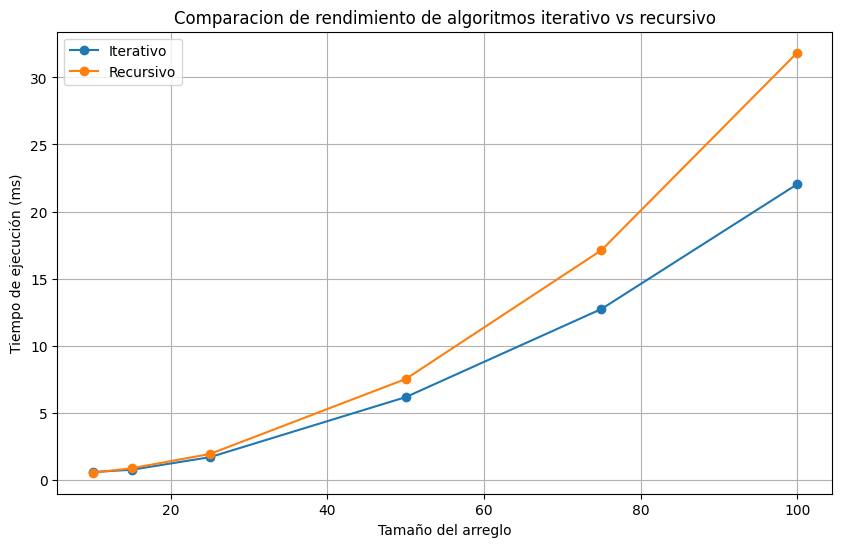

In [32]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, iterative_times, label='Iterativo', marker='o')
plt.plot(sizes, recursive_times, label='Recursivo', marker='o')
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo de ejecución (ms)')
plt.title('Comparacion de rendimiento de algoritmos iterativo vs recursivo')
plt.legend()
plt.grid(True)
plt.show()

### Tiempos de ejecucion con distintos tipos y tamaños de listas
- listas ordenadas
- listas inversamente ordenados
- listas con valores repetidos o distribuciones no uniformes.

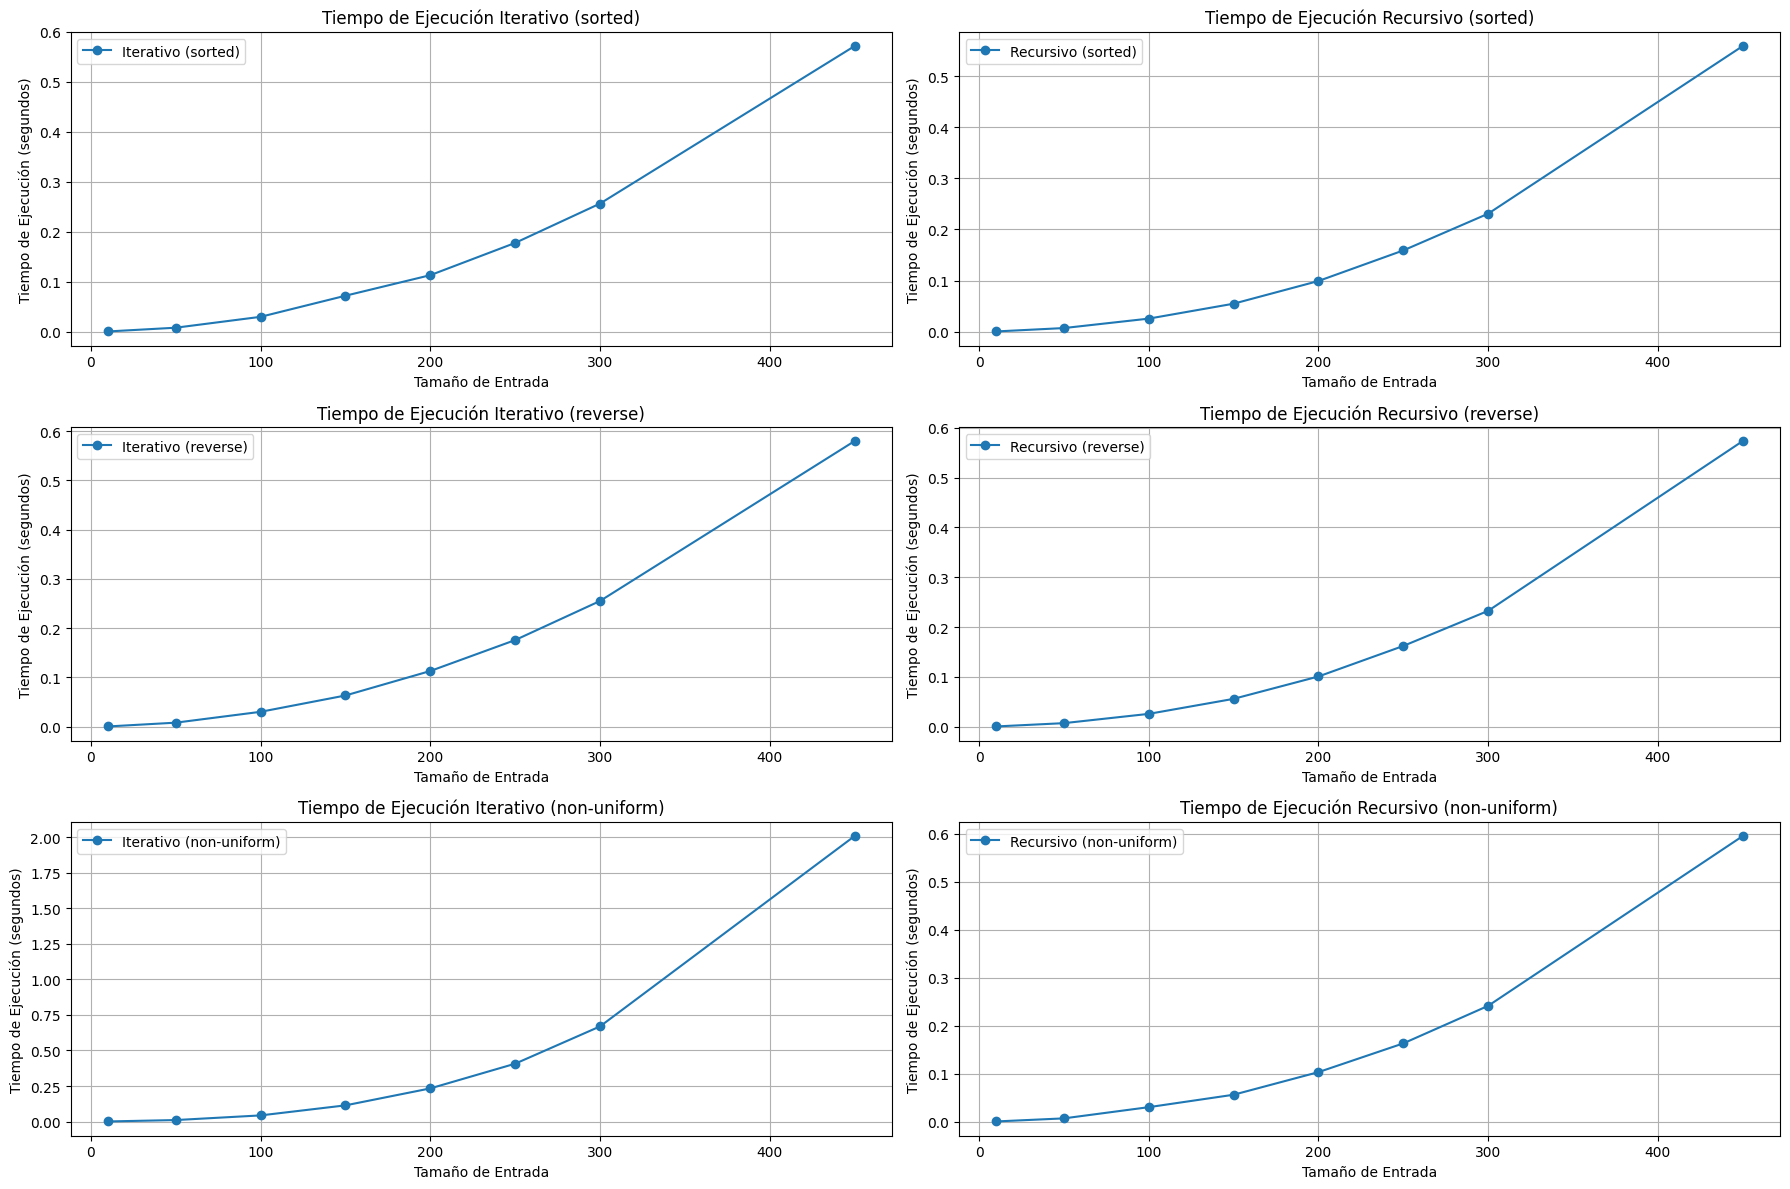

In [47]:
plt.figure(figsize=(18, 12))

for i, t in enumerate(types):
    plt.subplot(3, 2, 2*i + 1)
    plt.plot(sizes, iterative_times[t], marker='o', linestyle='-', label=f'Iterativo ({t})')
    plt.xlabel('Tamaño de Entrada')
    plt.ylabel('Tiempo de Ejecución (segundos)')
    plt.title(f'Tiempo de Ejecución Iterativo ({t})')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 2, 2*i + 2)
    plt.plot(sizes, recursive_times[t], marker='o', linestyle='-', label=f'Recursivo ({t})')
    plt.xlabel('Tamaño de Entrada')
    plt.ylabel('Tiempo de Ejecución (segundos)')
    plt.title(f'Tiempo de Ejecución Recursivo ({t})')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Tamaño de la pila de llamadas a lo largo del tiempo (recursivo)
no funciona

Call stack diagram saved as 'call_stack.png'


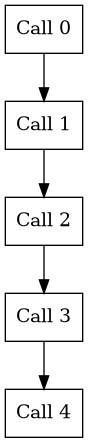

In [41]:
visualize_call_stack()

# To display the image (if using Jupyter or IPython)
from IPython.display import Image
Image(filename='call_stack.png')

### Carga CPU

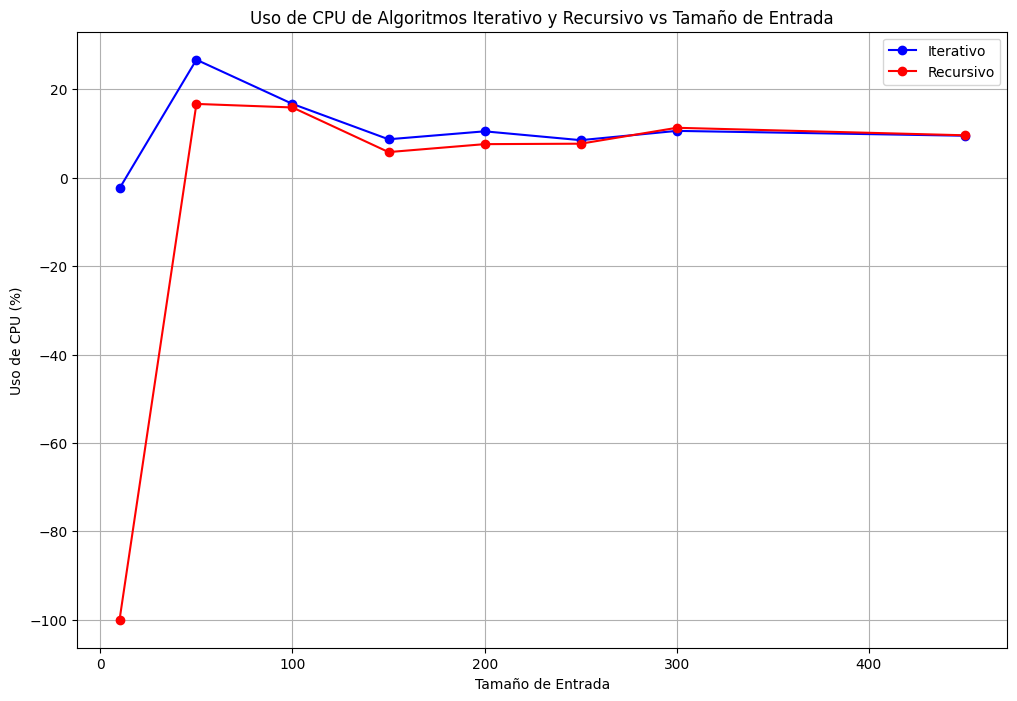

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(sizes, cpu_usage_iterative, marker='o', linestyle='-', color='b', label='Iterativo')
plt.plot(sizes, cpu_usage_recursive, marker='o', linestyle='-', color='r', label='Recursivo')
plt.xlabel('Tamaño de Entrada')
plt.ylabel('Uso de CPU (%)')
plt.title('Uso de CPU de Algoritmos Iterativo y Recursivo vs Tamaño de Entrada')
plt.legend()
plt.grid(True)
plt.show()

### Cantidad de memoria usada por llamada recursiva vs por num iteraciones 

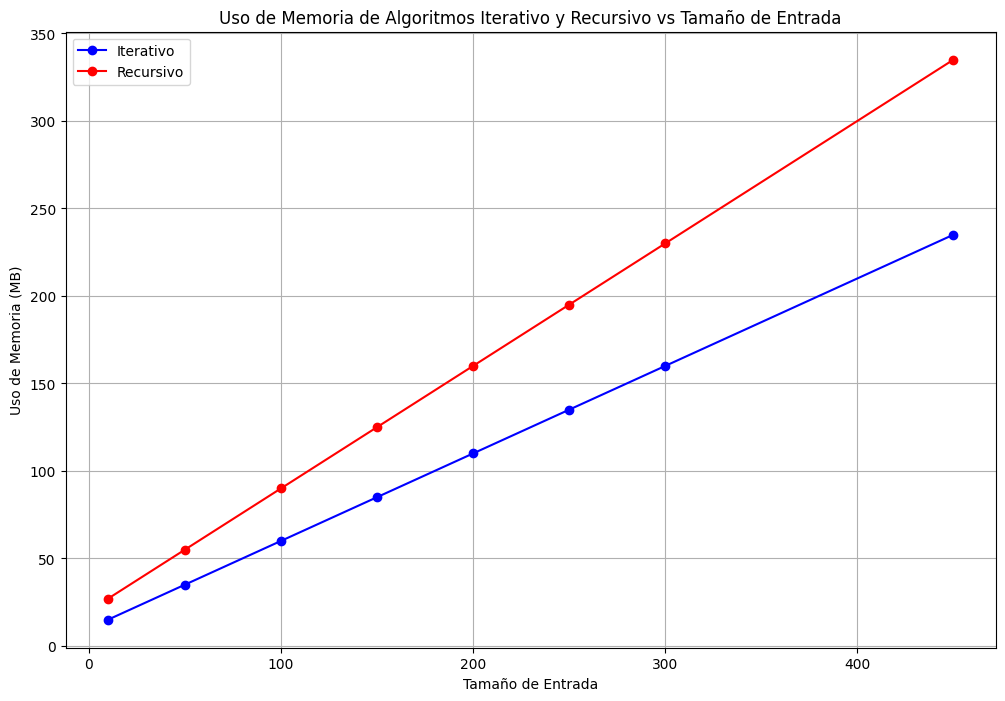

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(sizes, memory_usage_iterative, marker='o', linestyle='-', color='b', label='Iterativo')
plt.plot(sizes, memory_usage_recursive, marker='o', linestyle='-', color='r', label='Recursivo')
plt.xlabel('Tamaño de Entrada')
plt.ylabel('Uso de Memoria (MB)')
plt.title('Uso de Memoria de Algoritmos Iterativo y Recursivo vs Tamaño de Entrada')
plt.legend()
plt.grid(True)
plt.show()

### Distribución del Tiempo de Ejecución (histograma)
no funciona

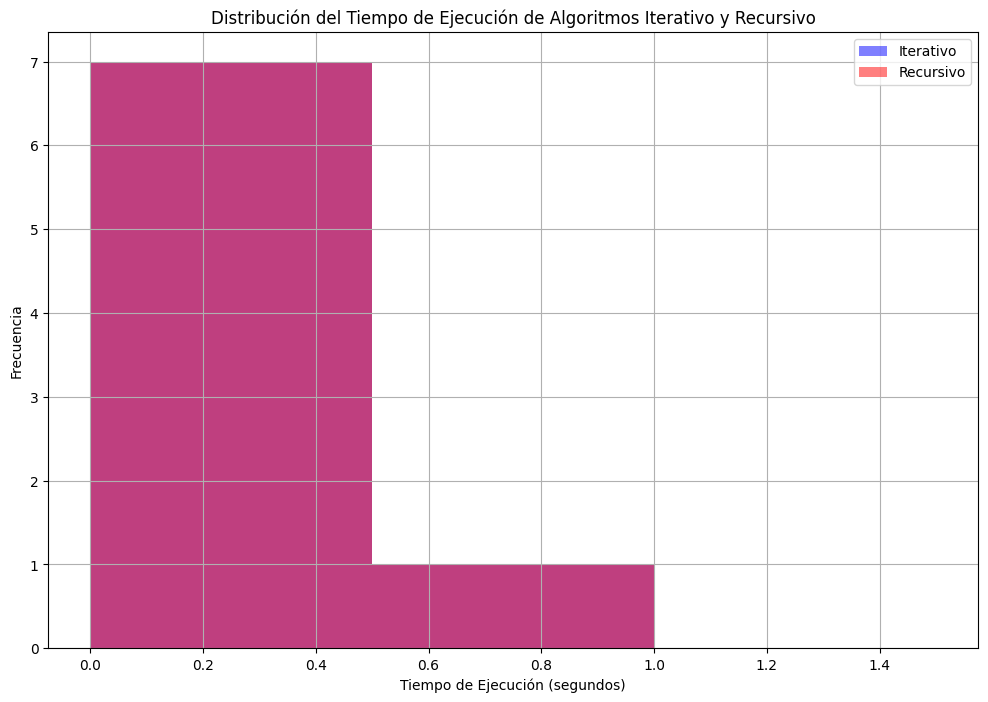

In [44]:
# Crear histogramas
plt.figure(figsize=(12, 8))

plt.hist(iterative_times, bins=np.arange(0, max(iterative_times) + 1, 0.5), alpha=0.5, label='Iterativo', color='blue')
plt.hist(recursive_times, bins=np.arange(0, max(recursive_times) + 1, 0.5), alpha=0.5, label='Recursivo', color='red')

plt.xlabel('Tiempo de Ejecución (segundos)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tiempo de Ejecución de Algoritmos Iterativo y Recursivo')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Extras
Ocupe estas celdas para estudiar otros algoritmos

## Algoritmos

### Solucion en C++ de subpermutations
XOR?

In [16]:

"""
#include <bits/stdc++.h>

using namespace std;

typedef pair<long long, long long> pt;

const int N = int(3e5) + 99;
const pt zero = make_pair(0, 0);

int n;
int a[N];
pt hsh[N], sumHsh[N];

void upd(pt &a, pt b){
    a.first ^= b.first;
    a.second ^= b.second;
}

int calc(int pos){
	set <int> sl, sr;
	set<pt> s;
	int r = pos + 1, l = pos - 1;
	pt curr = hsh[0], curl = zero;
	s.insert(zero);
	sr.insert(0), sl.insert(0);
	
	int res = 0;	
	while(r < n && !sr.count(a[r])){
		sr.insert(a[r]);
		upd(curr, hsh[a[r]]);
		++r;

		while(l >= 0 && !sl.count(a[l]) && a[l] < *sr.rbegin()){
			sl.insert(a[l]);
			upd(curl, hsh[a[l]]);
			s.insert(curl);
			--l;	
		}

		pt need = sumHsh[*sr.rbegin()];
		upd(need, curr);
		if(s.count(need)) ++res;
	}	

	return res;
}	

int main() {
    long long x = 0;
	cin >> n;
	for(int i = 0; i < n; ++i){
		cin >> a[i];
		--a[i];	
		x ^= a[i];
	}
	
	
	mt19937_64 rnd(time(NULL));
	for(int i = 0; i < N; ++i){
		hsh[i].first = rnd() ^ x;
		hsh[i].second = rnd() ^ x;
		sumHsh[i] = hsh[i];
		if(i > 0) upd(sumHsh[i], sumHsh[i - 1]);
	}
	
	int res = 0;
		
	for(int tc = 0; tc < 2; ++tc){
		for(int i = 0; i < n; ++i)
			if(a[i] == 0)
				res += calc(i) + (tc == 0);
		reverse(a, a + n);
	}
	cout << res << endl;

	return 0;
} 
"""

'\n#include <bits/stdc++.h>\n\nusing namespace std;\n\ntypedef pair<long long, long long> pt;\n\nconst int N = int(3e5) + 99;\nconst pt zero = make_pair(0, 0);\n\nint n;\nint a[N];\npt hsh[N], sumHsh[N];\n\nvoid upd(pt &a, pt b){\n    a.first ^= b.first;\n    a.second ^= b.second;\n}\n\nint calc(int pos){\n\tset <int> sl, sr;\n\tset<pt> s;\n\tint r = pos + 1, l = pos - 1;\n\tpt curr = hsh[0], curl = zero;\n\ts.insert(zero);\n\tsr.insert(0), sl.insert(0);\n\t\n\tint res = 0;\t\n\twhile(r < n && !sr.count(a[r])){\n\t\tsr.insert(a[r]);\n\t\tupd(curr, hsh[a[r]]);\n\t\t++r;\n\n\t\twhile(l >= 0 && !sl.count(a[l]) && a[l] < *sr.rbegin()){\n\t\t\tsl.insert(a[l]);\n\t\t\tupd(curl, hsh[a[l]]);\n\t\t\ts.insert(curl);\n\t\t\t--l;\t\n\t\t}\n\n\t\tpt need = sumHsh[*sr.rbegin()];\n\t\tupd(need, curr);\n\t\tif(s.count(need)) ++res;\n\t}\t\n\n\treturn res;\n}\t\n\nint main() {\n    long long x = 0;\n\tcin >> n;\n\tfor(int i = 0; i < n; ++i){\n\t\tcin >> a[i];\n\t\t--a[i];\t\n\t\tx ^= a[i];\n\t}\n\t\n\t

### Merge_sort

In [17]:
def merge_sort(arr, level=0):
    print(f"{'  ' * level}Dividir: {arr} #{level}")  # Mensaje para el paso de división
    
    if len(arr) <= 1:
        # **Caso Base**: Si el array tiene 1 o 0 elementos, ya está ordenado.
        print(f"{'  ' * level}Caso Base (ya ordenado): {arr}")
        return arr

    # **Dividir**: Encuentra el punto medio del array y divide en dos mitades.
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]
    
    # **Resolver**: Llama recursivamente a merge_sort en ambas mitades.
    left_sorted = merge_sort(left_half, level + 1)
    right_sorted = merge_sort(right_half, level + 1)
    print("paso los sorted")
    # **Combinar**: Combina las dos mitades ordenadas.
    merged = merge(left_sorted, right_sorted)
    print(f"{'  ' * level}Combinar: {left_sorted} y {right_sorted} => {merged}")
    return merged

def merge(left, right):
    sorted_list = []
    left_index, right_index = 0, 0

    # Combina las dos listas ordenadas en una lista ordenada.
    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            sorted_list.append(left[left_index])
            left_index += 1
        else:
            sorted_list.append(right[right_index])
            right_index += 1

    # Agrega los elementos restantes.
    sorted_list.extend(left[left_index:])
    sorted_list.extend(right[right_index:])
    
    return sorted_list

# Ejemplo de uso
array = [4, 1, 3, 7, 6, 2, 8, 5]
print("Array original:", array)
sorted_array = merge_sort(array)
print("Array ordenado:", sorted_array)


Array original: [4, 1, 3, 7, 6, 2, 8, 5]
Dividir: [4, 1, 3, 7, 6, 2, 8, 5] #0
  Dividir: [4, 1, 3, 7] #1
    Dividir: [4, 1] #2
      Dividir: [4] #3
      Caso Base (ya ordenado): [4]
      Dividir: [1] #3
      Caso Base (ya ordenado): [1]
paso los sorted
    Combinar: [4] y [1] => [1, 4]
    Dividir: [3, 7] #2
      Dividir: [3] #3
      Caso Base (ya ordenado): [3]
      Dividir: [7] #3
      Caso Base (ya ordenado): [7]
paso los sorted
    Combinar: [3] y [7] => [3, 7]
paso los sorted
  Combinar: [1, 4] y [3, 7] => [1, 3, 4, 7]
  Dividir: [6, 2, 8, 5] #1
    Dividir: [6, 2] #2
      Dividir: [6] #3
      Caso Base (ya ordenado): [6]
      Dividir: [2] #3
      Caso Base (ya ordenado): [2]
paso los sorted
    Combinar: [6] y [2] => [2, 6]
    Dividir: [8, 5] #2
      Dividir: [8] #3
      Caso Base (ya ordenado): [8]
      Dividir: [5] #3
      Caso Base (ya ordenado): [5]
paso los sorted
    Combinar: [8] y [5] => [5, 8]
paso los sorted
  Combinar: [2, 6] y [5, 8] => [2, 5, 6, 8]


### Max_subarray_sum

In [18]:
def max_subarray_sum(arr, left, right):
    print(f"max_subarray_sum(arr, {left}, {right})")  # Visualización de la llamada
    if left == right:
        print(f"Base case reached with single element {arr[left]} at index {left}")
        return arr[left]
    
    mid = (left + right) // 2
    print(f"Calculating left sum in range {left} to {mid}")
    left_sum = max_subarray_sum(arr, left, mid)
    print(f"Left sum calculated: {left_sum} for range {left} to {mid}")
    
    print(f"Calculating right sum in range {mid + 1} to {right}")
    right_sum = max_subarray_sum(arr, mid + 1, right)
    print(f"Right sum calculated: {right_sum} for range {mid + 1} to {right}")
    
    print(f"Calculating cross sum for range {left} to {right} with mid {mid}")
    cross_sum = max_crossing_sum(arr, left, mid, right)
    print(f"Cross sum calculated: {cross_sum} for range {left} to {right}")
    
    return max(left_sum, right_sum, cross_sum)

def max_crossing_sum(arr, left, mid, right):
    print(f"max_crossing_sum(arr, {left}, {mid}, {right})")  # Visualización de la llamada
    
    left_sum = float('-inf')
    sum = 0
    print(f"Calculating left part of cross sum")
    for i in range(mid, left - 1, -1):
        sum += arr[i]
        if sum > left_sum:
            left_sum = sum
        print(f"Left sum at index {i}: {left_sum}")
    
    right_sum = float('-inf')
    sum = 0
    print(f"Calculating right part of cross sum")
    for i in range(mid + 1, right + 1):
        sum += arr[i]
        if sum > right_sum:
            right_sum = sum
        print(f"Right sum at index {i}: {right_sum}")
    
    return left_sum + right_sum

# Test with example input
max_subarray_sum([1, -2, 4, 2, 5, -4], 0, 5)


max_subarray_sum(arr, 0, 5)
Calculating left sum in range 0 to 2
max_subarray_sum(arr, 0, 2)
Calculating left sum in range 0 to 1
max_subarray_sum(arr, 0, 1)
Calculating left sum in range 0 to 0
max_subarray_sum(arr, 0, 0)
Base case reached with single element 1 at index 0
Left sum calculated: 1 for range 0 to 0
Calculating right sum in range 1 to 1
max_subarray_sum(arr, 1, 1)
Base case reached with single element -2 at index 1
Right sum calculated: -2 for range 1 to 1
Calculating cross sum for range 0 to 1 with mid 0
max_crossing_sum(arr, 0, 0, 1)
Calculating left part of cross sum
Left sum at index 0: 1
Calculating right part of cross sum
Right sum at index 1: -2
Cross sum calculated: -1 for range 0 to 1
Left sum calculated: 1 for range 0 to 1
Calculating right sum in range 2 to 2
max_subarray_sum(arr, 2, 2)
Base case reached with single element 4 at index 2
Right sum calculated: 4 for range 2 to 2
Calculating cross sum for range 0 to 2 with mid 1
max_crossing_sum(arr, 0, 1, 2)
Calcu

11

## Graficas

### merge_sort

Dividir: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] #0
  Dividir: [1, 1, 1, 1, 1] #1
    Dividir: [1, 1] #2
      Dividir: [1] #3
      Caso Base (ya ordenado): [1]
      Dividir: [1] #3
      Caso Base (ya ordenado): [1]
    Combinar: [1] y [1] => [1, 1]
    Dividir: [1, 1, 1] #2
      Dividir: [1] #3
      Caso Base (ya ordenado): [1]
      Dividir: [1, 1] #3
        Dividir: [1] #4
        Caso Base (ya ordenado): [1]
        Dividir: [1] #4
        Caso Base (ya ordenado): [1]
      Combinar: [1] y [1] => [1, 1]
    Combinar: [1] y [1, 1] => [1, 1, 1]
  Combinar: [1, 1] y [1, 1, 1] => [1, 1, 1, 1, 1]
  Dividir: [1, 1, 1, 1, 1] #1
    Dividir: [1, 1] #2
      Dividir: [1] #3
      Caso Base (ya ordenado): [1]
      Dividir: [1] #3
      Caso Base (ya ordenado): [1]
    Combinar: [1] y [1] => [1, 1]
    Dividir: [1, 1, 1] #2
      Dividir: [1] #3
      Caso Base (ya ordenado): [1]
      Dividir: [1, 1] #3
        Dividir: [1] #4
        Caso Base (ya ordenado): [1]
        Dividir: [1] #4
      

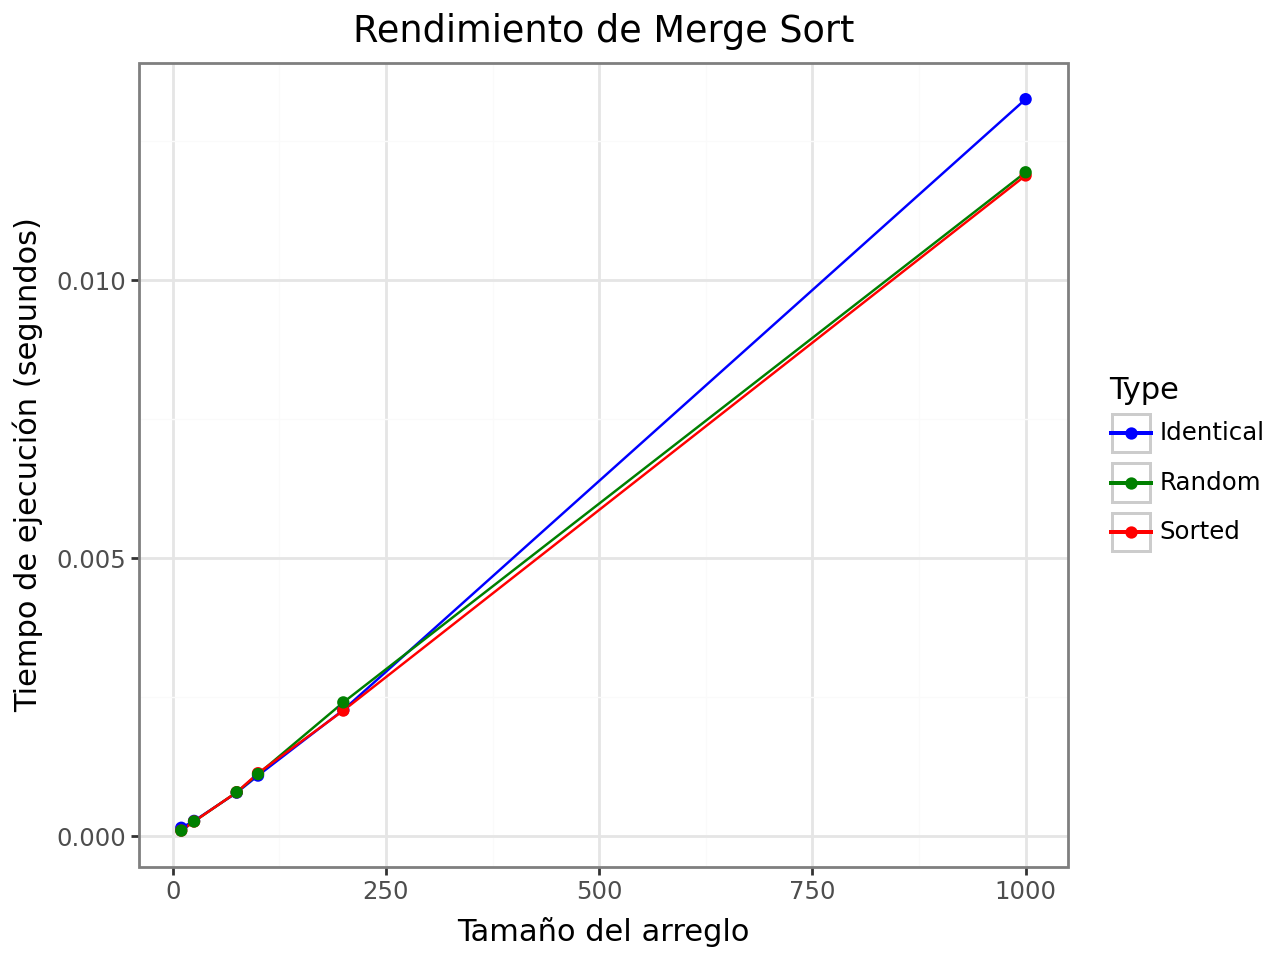

In [19]:
import numpy as np
import time
import pandas as pd
from plotnine import *

# Función para medir el rendimiento de merge_sort
def measure_performance(array, function):
    start_time = time.time()
    function(array)  # Pasar el arreglo a la función
    end_time = time.time()
    return end_time - start_time

# Función para generar arreglos
def generate_identical_array(size, value):
    return [value] * size

def generate_sorted_array(size):
    return list(range(1, size + 1))

def generate_random_array(size):
    return np.random.randint(1, size + 1, size).tolist()

# Merge Sort con mensajes de debug
def merge_sort(arr, level=0):
    print(f"{'  ' * level}Dividir: {arr} #{level}")  # Mensaje para el paso de división
    
    if len(arr) <= 1:
        # **Caso Base**: Si el array tiene 1 o 0 elementos, ya está ordenado.
        print(f"{'  ' * level}Caso Base (ya ordenado): {arr}")
        return arr

    # **Dividir**: Encuentra el punto medio del array y divide en dos mitades.
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]
    
    # **Resolver**: Llama recursivamente a merge_sort en ambas mitades.
    left_sorted = merge_sort(left_half, level + 1)
    right_sorted = merge_sort(right_half, level + 1)
    
    # **Combinar**: Combina las dos mitades ordenadas.
    merged = merge(left_sorted, right_sorted)
    print(f"{'  ' * level}Combinar: {left_sorted} y {right_sorted} => {merged}")
    return merged

def merge(left, right):
    sorted_list = []
    left_index, right_index = 0, 0

    # Combina las dos listas ordenadas en una lista ordenada.
    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            sorted_list.append(left[left_index])
            left_index += 1
        else:
            sorted_list.append(right[right_index])
            right_index += 1

    # Agrega los elementos restantes.
    sorted_list.extend(left[left_index:])
    sorted_list.extend(right[right_index:])
    
    return sorted_list

# Generar datos para prueba
sizes = [10, 25, 75, 100, 200, 1000]  # Tamaños de arreglo para prueba
identical_times = []
sorted_times = []
random_times = []

for size in sizes:
    identical_array = generate_identical_array(size, 1)
    sorted_array = generate_sorted_array(size)
    random_array = generate_random_array(size)

    # Medir tiempo para arrays idénticos
    identical_time = measure_performance(identical_array, merge_sort)
    identical_times.append(identical_time)

    # Medir tiempo para arrays ordenados
    sorted_time = measure_performance(sorted_array, merge_sort)
    sorted_times.append(sorted_time)

    # Medir tiempo para arrays aleatorios
    random_time = measure_performance(random_array, merge_sort)
    random_times.append(random_time)

# Preparar los datos para plotnine
data = {
    'Size': sizes * 3,
    'Time': identical_times + sorted_times + random_times,
    'Type': ['Identical'] * len(sizes) + ['Sorted'] * len(sizes) + ['Random'] * len(sizes)
}

df = pd.DataFrame(data)

# Graficar
plot = (ggplot(df, aes(x='Size', y='Time', color='Type'))
        + geom_line()
        + geom_point()
        + labs(title='Rendimiento de Merge Sort',
               x='Tamaño del arreglo',
               y='Tiempo de ejecución (segundos)')
        + theme_bw()
        + scale_color_manual(values=['blue', 'green', 'red']))

plot.show()


### max_subarray_sum

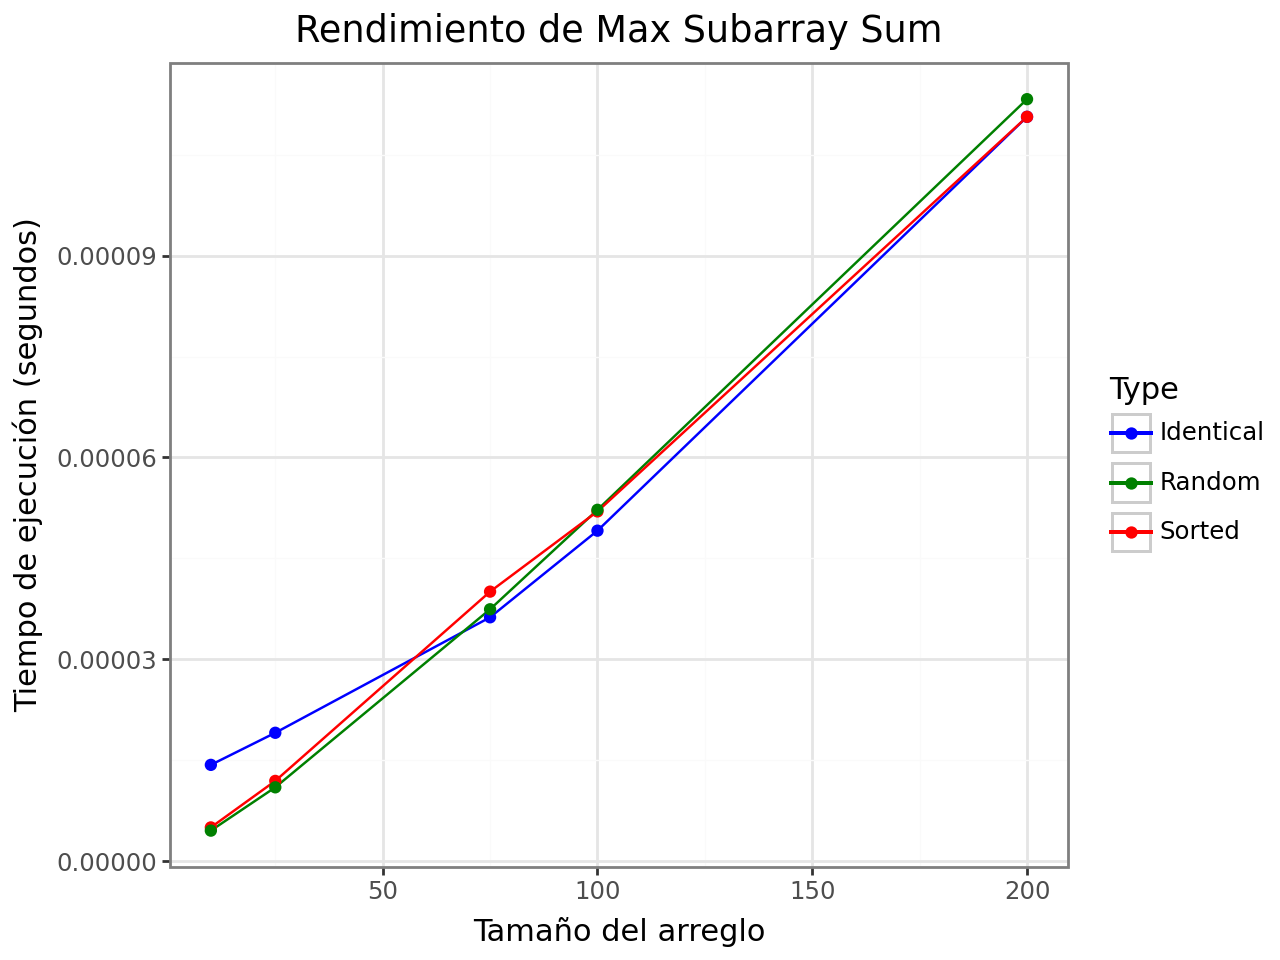

In [20]:
import numpy as np
import time
import pandas as pd
from plotnine import *

# Función para medir el rendimiento
def measure_performance(array, function):
    start_time = time.time()
    function(array, 0, len(array) - 1)  # Pasar el arreglo y los índices a la función
    end_time = time.time()
    return end_time - start_time

# Función para generar arreglos
def generate_identical_array(size, value):
    return [value] * size

def generate_sorted_array(size):
    return list(range(1, size + 1))

def generate_random_array(size):
    return np.random.randint(1, size + 1, size).tolist()

# Función para encontrar la suma máxima del subarreglo
def max_subarray_sum(arr, left, right):
    if left == right:
        return arr[left]
    
    mid = (left + right) // 2
    left_sum = max_subarray_sum(arr, left, mid)
    right_sum = max_subarray_sum(arr, mid + 1, right)
    cross_sum = max_crossing_sum(arr, left, mid, right)
    return max(left_sum, right_sum, cross_sum)
    
def max_crossing_sum(arr, left, mid, right):
    left_sum = float('-inf')
    sum = 0
    for i in range(mid, left - 1, -1):
        sum += arr[i]
        if sum > left_sum:
            left_sum = sum
    
    right_sum = float('-inf')
    sum = 0
    for i in range(mid + 1, right + 1):
        sum += arr[i]
        if sum > right_sum:
            right_sum = sum
    
    return left_sum + right_sum

# Generar datos para prueba
sizes = [10, 25, 75, 100, 200]  # Tamaños de arreglo para prueba
identical_times = []
sorted_times = []
random_times = []

for size in sizes:
    identical_array = generate_identical_array(size, 1)
    sorted_array = generate_sorted_array(size)
    random_array = generate_random_array(size)

    # Medir tiempo para arrays idénticos
    identical_time = measure_performance(identical_array, max_subarray_sum)
    identical_times.append(identical_time)

    # Medir tiempo para arrays ordenados
    sorted_time = measure_performance(sorted_array, max_subarray_sum)
    sorted_times.append(sorted_time)

    # Medir tiempo para arrays aleatorios
    random_time = measure_performance(random_array, max_subarray_sum)
    random_times.append(random_time)

# Preparar los datos para plotnine
data = {
    'Size': sizes * 3,
    'Time': identical_times + sorted_times + random_times,
    'Type': ['Identical'] * len(sizes) + ['Sorted'] * len(sizes) + ['Random'] * len(sizes)
}

df = pd.DataFrame(data)

# Graficar
plot = (ggplot(df, aes(x='Size', y='Time', color='Type'))
        + geom_line()
        + geom_point()
        + labs(title='Rendimiento de Max Subarray Sum',
               x='Tamaño del arreglo',
               y='Tiempo de ejecución (segundos)')
        + theme_bw()
        + scale_color_manual(values=['blue', 'green', 'red']))

plot.show()
